# Confidence Interval

## Mean confidence interval

Jenis 1: Data angka numerik, misalnya "berapa tinggi badan orang Indonesia?" jadilah sebuah Confidence Interval misalnya 150-175cm untuk menandakan 95% confidence level orang indonesia tinggi badannya ada di dalam range tersebut. [150, 175]. aslinya mean 162.5 dengan std 12.5

## Proportion confidence interval

Jenis 2: Tipe proporsi atau persentasi, misalnya "berapa banyak orang Indonesia yang tingginya diatas 175cm?" jadilah sebuah Confidence Interval yang memberikan persentase tersebut dalam bentuk range, misalnya [10-20]%, jadi setelah dihitung kita dapat angka 15 +- 5% untuk probabilitas org indo tinggi > 175


In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import data
df_austin_weather = pd.read_csv("dataset/austin_weather.csv")

# convert data types to numeric for numeric columns
col_list = list(df_austin_weather.columns)
col_list.remove('Date')
col_list.remove('Events')

# semua kolom yang harusnya numerik diubah jadi numerik
for col in col_list:
    df_austin_weather[col] = pd.to_numeric(
        df_austin_weather[col], errors='coerce')

# kolom Date diubah jadi tipe datetime
df_austin_weather['Date'] = pd.to_datetime(df_austin_weather['Date'])

# cek data
df_austin_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1312 non-null   float64       
 5   DewPointAvgF                1312 non-null   float64       
 6   DewPointLowF                1312 non-null   float64       
 7   HumidityHighPercent         1317 non-null   float64       
 8   HumidityAvgPercent          1317 non-null   float64       
 9   HumidityLowPercent          1317 non-null   float64       
 10  SeaLevelPressureHighInches  1316 non-null   float64       
 11  SeaLevelPressureAvgInches   1316 non-null   float64     

In [6]:
df_austin_weather['Events'].value_counts()

Events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

jenis event sepertinya cuma 4: Rain, Thunderstorm, Fog, Snow

tapi bisa terjadi berbarengan, jadi baiknya data ini diubah jadi 4 kolom untuk masing2 event dan di mark 1 untuk terjadi, 0 untuk tidak terjadi


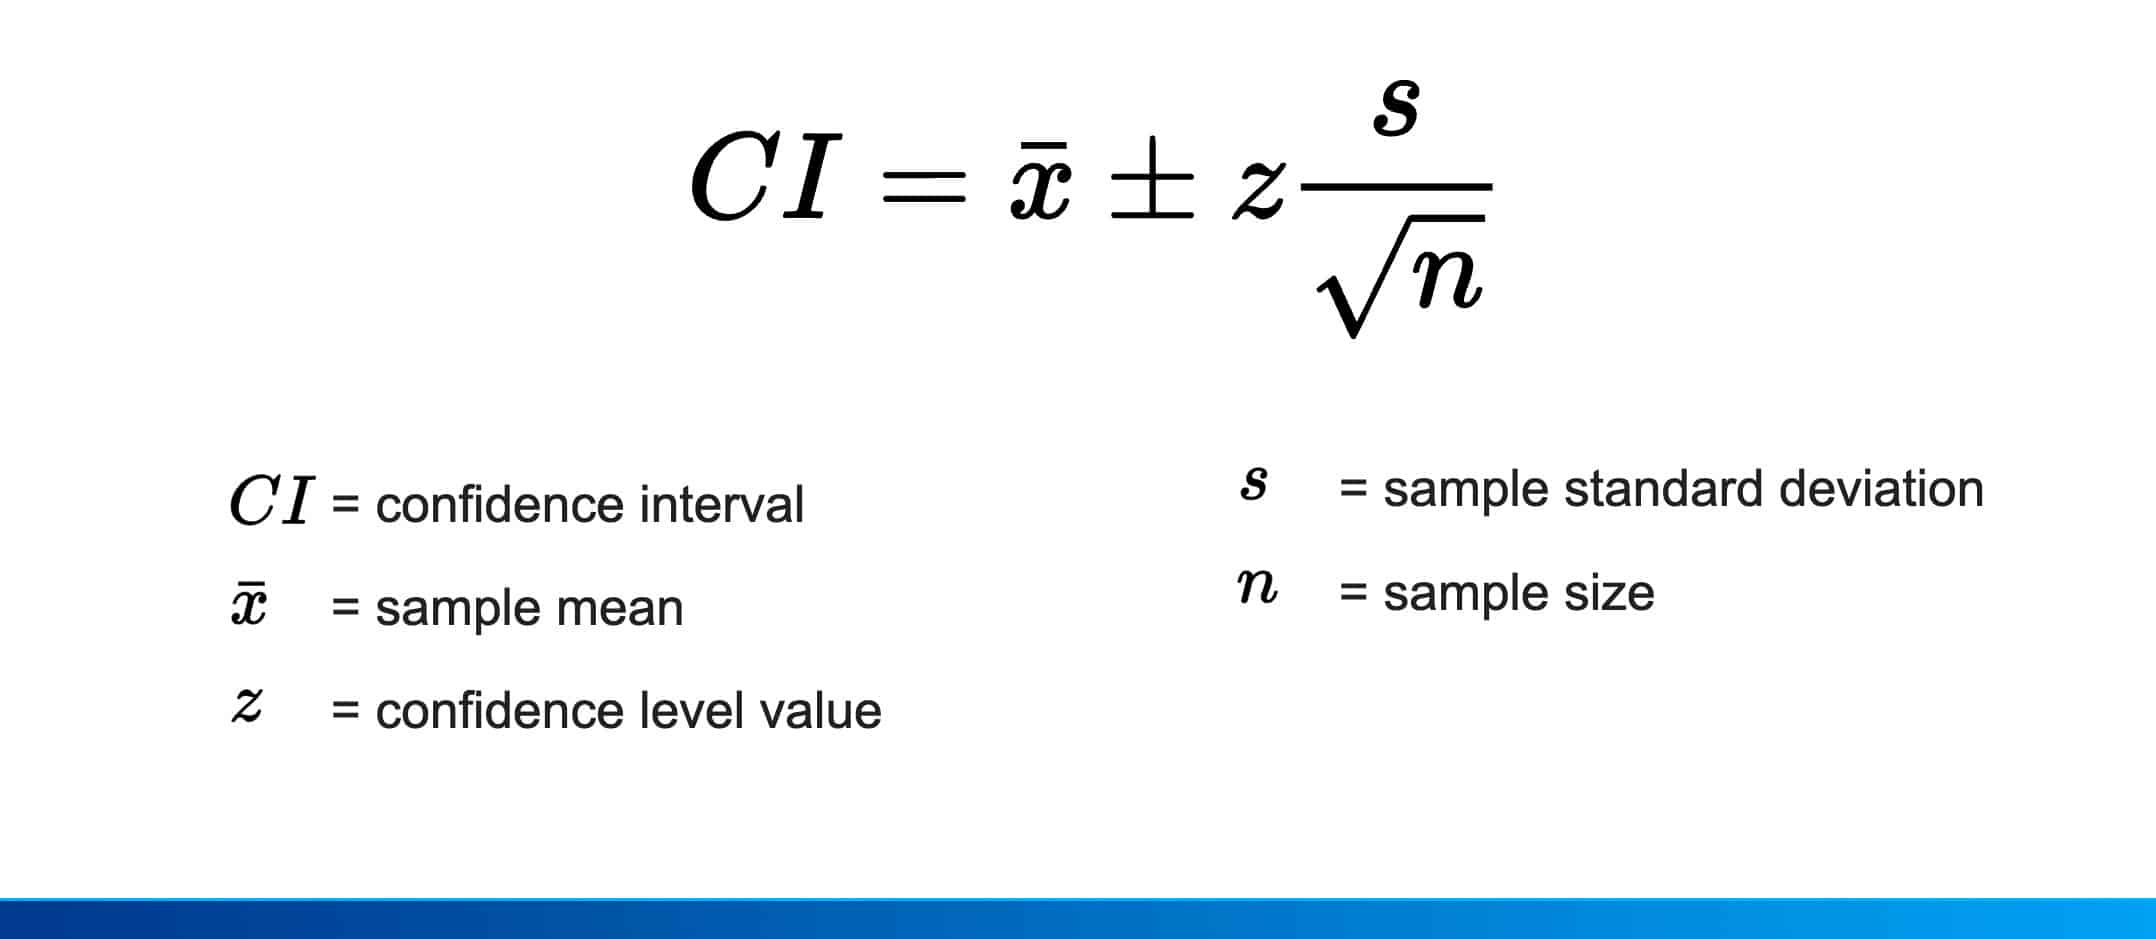


Misalnya, kita mau buat _Confidence Interval_ untuk average wind speed (mph)

1. wind data, kolom WindAvgMPH
2. hitung n, mean, std:
   - n jumlah data
   - mean rata2 karena kita mencari mean confidence interval
   - std spread
3. untuk angka z, confidence level value 1.96 untuk tingkat confidence 95%


In [12]:
dwind = df_austin_weather['WindAvgMPH']

n = dwind.count()
mean = dwind.mean()
std = dwind.std()
z = 1.96

SE = std / np.sqrt(n)
upper = mean + z * SE
lower = mean - z * SE

print([lower, upper], "wind average mph speed")

[4.895666003236655, 5.121038628502146] wind average mph speed


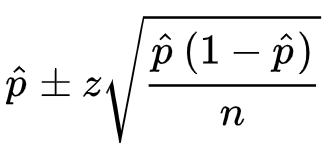


Misalnya, kita mau buat _Confidence Interval_ untuk proporsi

berapa kemungkinan wind speed diatas 5.1 mph?

1. proporsi awal, dari data kita ada berapa p yang diatas 5.1?
2. z di 1.96 untuk level confidence 95%
3. n jumlah data


In [11]:
dwind = df_austin_weather['WindAvgMPH']

diatas51 = dwind[dwind > 5.1]
n_diatas51 = diatas51.count()

n = dwind.count()

p = n_diatas51 / n
print(n_diatas51, n, p)

z = 1.96

SE = np.sqrt(p * (1-p) / n)
upper = p + z * SE
lower = p - z * SE

print([lower, upper], "kemungkinan angin diatas 5.1mph")

508 1317 0.38572513287775245
[0.3594355602659096, 0.4120147054895953] kemungkinan angin diatas 5.1mph


In [15]:
dwind = df_austin_weather['WindAvgMPH']

diatas6 = dwind[dwind > 6]
n_diatas6 = diatas6.count()

n = dwind.count()

p = n_diatas6 / n
print(n_diatas6, n, p)

z = 1.96

SE = np.sqrt(p * (1-p) / n)
upper = p + z * SE
lower = p - z * SE

print([lower, upper], "kemungkinan angin diatas 6mph")

310 1317 0.23538344722854973
[0.21247092015643673, 0.2582959743006627] kemungkinan angin diatas 6mph


In [14]:
print(f"{int(lower * 100)}% - {int(upper * 100)}% kemungkinan angin diatas 6 mph")

21% - 25% kemungkinan angin diatas 6 mph
